In [1]:
from fastai.vision import *
import torch.nn as nn
import pandas as pd
import numpy as np

## 定义数据

In [2]:
root_dir = '/home/hanshan/Data/DataCV/DataSets/huawei-garbage-classification/'

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(root_dir, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4, bs=32).normalize(imagenet_stats)

In [5]:
data.classes

['00-其他垃圾-一次性快餐盒',
 '01-其他垃圾-污损塑料',
 '02-其他垃圾-烟蒂',
 '03-其他垃圾-牙签',
 '04-其他垃圾-破碎花盆及碟碗',
 '05-其他垃圾-竹筷',
 '06-厨余垃圾-剩饭剩菜',
 '07-厨余垃圾-大骨头',
 '08-厨余垃圾-水果果皮',
 '09-厨余垃圾-水果果肉',
 '10-厨余垃圾-茶叶渣',
 '11-厨余垃圾-菜叶菜根',
 '12-厨余垃圾-蛋壳',
 '13-厨余垃圾-鱼骨',
 '14-可回收物-充电宝',
 '15-可回收物-包',
 '16-可回收物-化妆品瓶',
 '17-可回收物-塑料玩具',
 '18-可回收物-塑料碗盆',
 '19-可回收物-塑料衣架',
 '20-可回收物-快递纸袋',
 '21-可回收物-插头电线',
 '22-可回收物-旧衣服',
 '23-可回收物-易拉罐',
 '24-可回收物-枕头',
 '25-可回收物-毛绒玩具',
 '26-可回收物-洗发水瓶',
 '27-可回收物-玻璃杯',
 '28-可回收物-皮鞋',
 '29-可回收物-砧板',
 '30-可回收物-纸板箱',
 '31-可回收物-调料瓶',
 '32-可回收物-酒瓶',
 '33-可回收物-金属食品罐',
 '34-可回收物-锅',
 '35-可回收物-食用油桶',
 '36-可回收物-饮料瓶',
 '37-有害垃圾-干电池',
 '38-有害垃圾-软膏',
 '39-有害垃圾-过期药物']

## 定义模型

In [6]:
learn = cnn_learner(data,models.densenet201, pretrained=True, metrics=[accuracy, error_rate],
                    callback_fns=[ShowGraph])

In [7]:
len(learn.layer_groups)

3

In [8]:
path = Path('/home/hanshan/Data/DataCV/SummaryWriterfastai/huawei-garbage/dsn201')
if not os.path.exists(path):
    os.makedirs(path)

In [9]:
path

PosixPath('/home/hanshan/Data/DataCV/SummaryWriterfastai/huawei-garbage/dsn201')

## first stage

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.09E-03
Min loss divided by 10: 4.79E-03


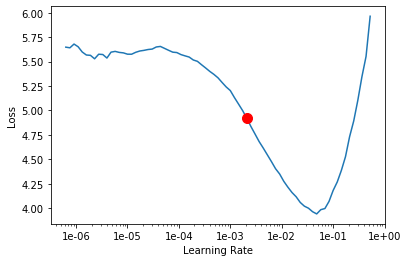

In [10]:
learn.freeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [11]:
lr = 3e-3

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.053939,0.680495,0.810473,0.189527,01:42
1,0.842977,0.541411,0.843243,0.156757,01:40
2,0.615868,0.432319,0.873649,0.126351,01:41
3,0.411937,0.375264,0.886149,0.113851,01:41
4,0.270658,0.357423,0.891216,0.108784,01:41


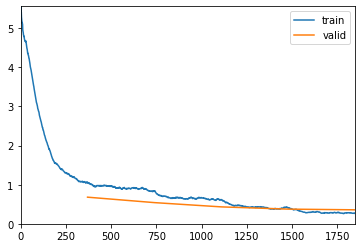

In [12]:
learn.fit_one_cycle(5, slice(lr))

In [13]:
learn.save(path/'stage-1')

## two stage

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


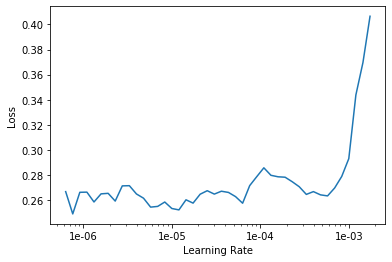

In [14]:
learn.load(path/'stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.330101,0.381015,0.885473,0.114527,02:09
1,0.343356,0.421608,0.880743,0.119257,02:09
2,0.245418,0.361826,0.894257,0.105743,02:09
3,0.136913,0.333412,0.903378,0.096622,02:09
4,0.106845,0.323532,0.908784,0.091216,02:09


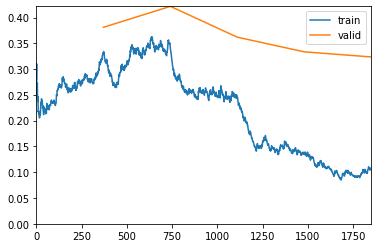

In [15]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

In [16]:
learn.save(path/'stage2')

## three stage 

In [ ]:
data = (ImageList.from_df(df=df, path=root_dir)
        .split_by_idxs(train_idx=train_index, valid_idx=valid_index)
        .label_from_df()
        .transform(get_transforms(), size=256, resize_method=ResizeMethod.SQUISH)
        .databunch(bs=32)
        .normalize(imagenet_stats))

In [ ]:
learn.load(path/'stage2')

In [ ]:
preds, target = learn.TTA()

In [ ]:
accuracy(preds, target)

In [ ]:
learn.data=data
learn.freeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(5, slice(3e-3), wd=1e-3)

In [ ]:
preds, target = learn.TTA()

In [ ]:
accuracy(preds, target)